In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-06-17 12:57:01--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.007s  

2024-06-17 12:57:01 (31.2 MB/s) - ‘names.txt’ saved [228145/228145]



In [3]:
words = open("names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [8]:
stoi = {c:i+1 for i, c in enumerate(sorted(list(set(''.join(words)))))}
stoi['.'] = 0
itos = {i:c for c, i in stoi.items()}
stoi, itos

({'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26,
  '.': 0},
 {1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z',
  0: '.'})

In [80]:
block_size = 3
X, y = [], []

for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

In [28]:
X.shape

torch.Size([32, 3])

In [30]:
C = torch.randn(27, 2)
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [42]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [46]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [47]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [49]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [50]:
counts = logits.exp()

In [53]:
probs = counts/counts.sum(dim=1, keepdim=True)
probs.shape

torch.Size([32, 27])

In [57]:
loss = -probs[torch.arange(32), y].log().mean()
loss

tensor(20.1217)

In [92]:
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [93]:
for p in parameters:
  p.requires_grad = True

In [94]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [97]:
lri = []
lossi = []

for epoch in range(1000):

  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, y[ix])

  # backward pass
  for p in parameters:
    p.grad = None

  loss.backward()
  # lr = lrs[epoch]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad
  # lri.append(lr.item())
  # lossi.append(loss.item())
  print(f"epoch:{epoch}, loss:{loss}")


epoch:0, loss:7.985831260681152
epoch:1, loss:5.936862945556641
epoch:2, loss:5.1812357902526855
epoch:3, loss:6.1660075187683105
epoch:4, loss:6.514764785766602
epoch:5, loss:4.992325305938721
epoch:6, loss:4.773492813110352
epoch:7, loss:4.542897701263428
epoch:8, loss:4.5885138511657715
epoch:9, loss:4.870693683624268
epoch:10, loss:4.43678092956543
epoch:11, loss:4.026261806488037
epoch:12, loss:4.330419540405273
epoch:13, loss:4.248042106628418
epoch:14, loss:4.350749492645264
epoch:15, loss:4.912435531616211
epoch:16, loss:3.7825653553009033
epoch:17, loss:3.437844753265381
epoch:18, loss:4.8391289710998535
epoch:19, loss:3.7299857139587402
epoch:20, loss:4.120014190673828
epoch:21, loss:2.8337321281433105
epoch:22, loss:2.989769220352173
epoch:23, loss:3.50419545173645
epoch:24, loss:3.3389201164245605
epoch:25, loss:3.4946987628936768
epoch:26, loss:3.293546676635742
epoch:27, loss:3.4667251110076904
epoch:28, loss:3.0420472621917725
epoch:29, loss:3.7092747688293457
epoch:30, 

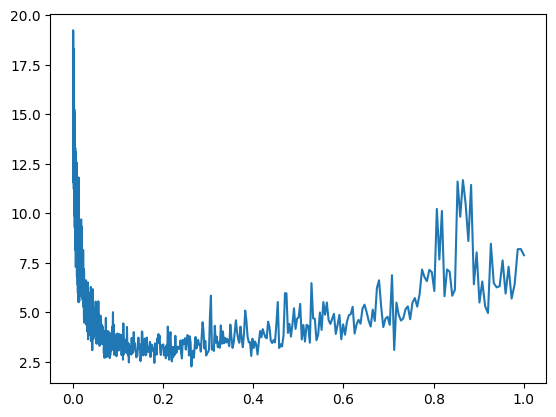

In [96]:
plt.plot(lri, lossi)